In [1]:
#Import statements
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import statsmodels.api as sm

In [2]:
#Read in csv file
fat_df = pd.read_csv("fat.csv")
fat_df

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
0,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,11.5,11.0,1.0736,70,134.25,67.00,21.1,118.9,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,32.3,33.6,1.0236,72,201.00,69.75,29.1,136.1,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,28.3,29.3,1.0328,72,186.75,66.00,30.2,133.9,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,25.3,26.0,1.0399,72,190.75,70.50,27.0,142.6,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [3]:
#fat1train, fat1test = train_test_split(fat_df, test_size=0.1, random_state=7406, shuffle=True)
test_idx = [1, 21, 22, 57, 70, 88, 91, 94, 121, 127, 149, 151, 159, 162, 
            164, 177, 179, 194, 206, 214, 215, 221, 240, 241, 243]
fat1test = fat_df.loc[test_idx,:]
fat1train = fat_df.drop(test_idx, axis=0)

In [4]:
fat1train.corr()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
brozek,1.000000,0.999710,-0.986440,0.279714,0.630109,-0.064712,0.726189,0.052401,0.505780,0.705517,0.820042,0.632590,0.595457,0.532855,0.283534,0.496851,0.383996,0.373018
siri,0.999710,1.000000,-0.986095,0.282610,0.628748,-0.065390,0.725134,0.050877,0.504438,0.704907,0.819402,0.631539,0.593044,0.533439,0.282290,0.496747,0.381380,0.371586
density,-0.986440,-0.986095,1.000000,-0.267295,-0.606866,0.076131,-0.711436,-0.033110,-0.483590,-0.681817,-0.802972,-0.613142,-0.583777,-0.515427,-0.280240,-0.488777,-0.368904,-0.346626
age,0.279714,0.282610,-0.267295,1.000000,-0.000863,-0.167824,0.133950,-0.214925,0.148224,0.182583,0.239265,-0.039063,-0.181840,0.026082,-0.090714,-0.046966,-0.056426,0.244283
weight,0.630109,0.628748,-0.606866,-0.000863,1.000000,0.304490,0.887813,0.797687,0.822716,0.891745,0.886031,0.938048,0.865138,0.847362,0.589944,0.797047,0.601394,0.724117
height,-0.064712,-0.065390,0.076131,-0.167824,0.304490,1.000000,-0.021145,0.472508,0.259290,0.144172,0.093387,0.166559,0.125175,0.256740,0.240348,0.210157,0.220972,0.318562
adipos,0.726189,0.725134,-0.711436,0.133950,0.887813,-0.021145,1.000000,0.565854,0.773012,0.903842,0.917989,0.878433,0.828631,0.722314,0.490983,0.745542,0.537136,0.630689
free,0.052401,0.050877,-0.033110,-0.214925,0.797687,0.472508,0.565854,1.000000,0.672803,0.607052,0.504948,0.711644,0.659555,0.692430,0.552379,0.657428,0.509196,0.660682
neck,0.505780,0.504438,-0.483590,0.148224,0.822716,0.259290,0.773012,0.672803,1.000000,0.779197,0.749752,0.721620,0.679592,0.663067,0.449988,0.715584,0.587635,0.737523
chest,0.705517,0.704907,-0.681817,0.182583,0.891745,0.144172,0.903842,0.607052,0.779197,1.000000,0.908058,0.820681,0.734374,0.712614,0.460713,0.723109,0.562111,0.658388


<AxesSubplot:xlabel='brozek'>

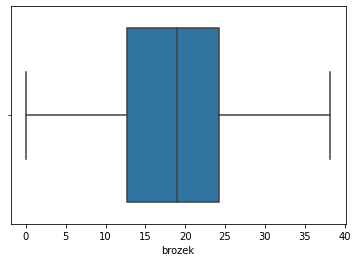

In [5]:
sns.boxplot(x = fat1train['brozek'])

/var/folders/69/hd2w2pjd6nd_tfs6y9rc_c8c0000gp/T/ipykernel_64340/3915480349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fat1train['brozek'])


<AxesSubplot:xlabel='brozek', ylabel='Density'>

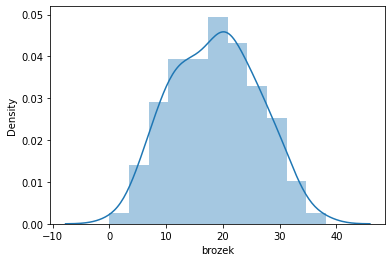

In [6]:
sns.distplot(fat1train['brozek'])

In [7]:
fat1train.describe()

,brozek,siri,density,age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,18.628194,18.814537,1.056333,45.013216,177.430396,70.102423,25.253744,143.081498,37.879736,100.403524,92.072247,99.521145,59.193833,38.472687,23.057269,32.170485,28.585022,18.200881
std,7.604668,8.207692,0.018750,12.540723,28.733212,3.744498,3.505245,17.447423,2.398402,8.159737,10.484328,7.050349,5.225309,2.322524,1.701945,2.991546,1.993184,0.925977
min,0.000000,0.000000,1.010100,22.000000,118.500000,29.500000,18.100000,107.900000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.700000,12.350000,1.042300,36.500000,157.750000,68.250000,23.050000,131.500000,36.350000,94.000000,84.350000,95.250000,55.950000,36.850000,22.000000,30.150000,27.300000,17.600000
50%,19.000000,19.100000,1.055100,43.000000,175.250000,70.000000,24.900000,141.100000,37.900000,99.600000,90.700000,99.100000,58.900000,38.400000,22.700000,32.000000,28.700000,18.200000
75%,24.250000,24.900000,1.070700,54.000000,195.375000,72.250000,27.000000,152.800000,39.250000,105.000000,98.850000,102.650000,62.100000,39.800000,23.950000,34.100000,30.000000,18.800000
max,38.200000,40.100000,1.108900,81.000000,363.150000,77.750000,48.900000,240.500000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [8]:
X_train = fat1train.drop('brozek',axis=1)
y_train = fat1train['brozek']
lm = LinearRegression().fit(X_train, y_train)

In [9]:
X_test = fat1test.drop('brozek',axis=1)
y_test = fat1test['brozek']

In [10]:
#Train Error
train_mse = mean_squared_error(y_train, lm.predict(X_train))
test_mse = mean_squared_error(y_test, lm.predict(X_test))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.028777733601962237  | Test MSE:  0.012996870362070588


In [11]:
combs = list(combinations(X_train.columns, 5))
best_rss = 0
best_comb = None

for comb in combs:
    tmp_x = X_train[list(combs[0])]
    tmp_lm = LinearRegression().fit(tmp_x, y_train)
    tmp_score = tmp_lm.score(tmp_x,y_train)
    if tmp_score > best_rss:
        best_rss = tmp_score
        best_comb = comb

In [36]:
best_comb

('siri', 'density', 'age', 'weight', 'height')

In [12]:
k_5_lm = LinearRegression().fit(X_train[list(best_comb)], y_train)
train_mse = mean_squared_error(y_train, k_5_lm.predict(X_train[list(best_comb)]))
test_mse = mean_squared_error(y_test, k_5_lm.predict(X_test[list(best_comb)]))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.03198079231134047  | Test MSE:  0.00787544871755143


In [13]:
#function inspired and refactored from https://www.datasklr.com/ols-least-squares-regression/variable-selection
def forward_regression(X, y,
                       initial_list=[], 
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    curr_aic = 1e9
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_aic = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_aic[new_column] = model.aic
        best_aic = new_aic.min()
        if best_aic < curr_aic:
            best_feature = new_aic.index[new_aic == best_aic].tolist()[0]
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add ',best_feature,' with aic ',best_aic)
        curr_aic = best_aic
        if not changed:
            break

    return included

In [14]:
selected_vars = forward_regression(X_train,y_train)

Add  siri  with aic  -123.38428589079399
Add  density  with aic  -127.08557851442686
Add  thigh  with aic  -129.33547684647056
Add  knee  with aic  -132.72234603914808
Add  wrist  with aic  -133.75921463781867
Add  biceps  with aic  -135.90126224712606
Add  forearm  with aic  -138.54471481315056


/var/folders/69/hd2w2pjd6nd_tfs6y9rc_c8c0000gp/T/ipykernel_64340/635923164.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_aic = pd.Series(index=excluded)
/var/folders/69/hd2w2pjd6nd_tfs6y9rc_c8c0000gp/T/ipykernel_64340/635923164.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_aic = pd.Series(index=excluded)
/var/folders/69/hd2w2pjd6nd_tfs6y9rc_c8c0000gp/T/ipykernel_64340/635923164.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_aic = pd.Series(index=excluded)
/var/folders/69/hd2w2pjd6nd_tfs6y9rc_c8c0000gp/T/ipykernel_64340/635923164.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead 

In [15]:
step_lm = LinearRegression().fit(X_train[selected_vars], y_train)
train_mse = mean_squared_error(y_train, step_lm.predict(X_train[selected_vars]))
test_mse = mean_squared_error(y_test, step_lm.predict(X_test[selected_vars]))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.029638212480354354  | Test MSE:  0.013213014750610026


In [16]:
ridge_clf = RidgeCV(alphas=np.arange(0.01,1,0.001), store_cv_values=True).fit(X_train, y_train)

In [17]:
ridge_clf.alpha_

0.01

In [18]:
train_mse = mean_squared_error(y_train, ridge_clf.predict(X_train))
test_mse = mean_squared_error(y_test, ridge_clf.predict(X_test))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.029372567430054525  | Test MSE:  0.013056345004719774


In [19]:
ridge_clf.cv_values_.shape

(227, 990)

In [20]:
lasso_clf = LassoCV(cv=5, random_state=7406).fit(X_train, y_train)

In [21]:
lasso_clf.alpha_

0.13707632362359057

In [22]:
train_mse = mean_squared_error(y_train, lasso_clf.predict(X_train))
test_mse = mean_squared_error(y_test, lasso_clf.predict(X_test))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.03323077629269723  | Test MSE:  0.0072823790778779665


In [23]:
pca_scores=[]
best_component = None
best_score = 0
for i in range(1,18):
    x_pca = PCA(n_components=i).fit_transform(X_train)
    pca_clf = LinearRegression().fit(x_pca, y_train)
    score = pca_clf.score(x_pca,y_train)
    pca_scores.append(score)
    if score > best_score:
        best_score = score
        best_component = i
print(best_score)
print(best_component)

0.9995001801291656
17


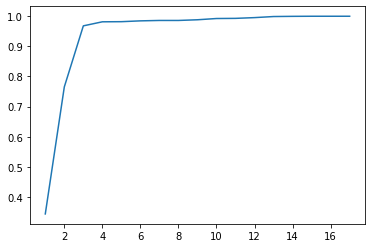

In [24]:
plt.plot(range(1,18), pca_scores)

In [25]:
pca_model = PCA(n_components=best_component)
x_pca = pca_model.fit_transform(X_train)
pca_clf = LinearRegression().fit(x_pca, y_train)
train_mse = mean_squared_error(y_train, pca_clf.predict(pca_model.transform(X_train)))
test_mse = mean_squared_error(y_test, pca_clf.predict(pca_model.transform(X_test)))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.028777733601962122  | Test MSE:  0.012996870362068908


In [26]:
pls_scores=[]
best_component = None
best_score = 0
for i in range(1,18):
    pls = PLSRegression(n_components=i).fit(X_train, y_train)
    score = pls.score(X_train,y_train)
    pls_scores.append(score)
    if score > best_score:
        best_score = score
        best_component = i
print(best_score)
print(best_component)

0.9995001801291656
17


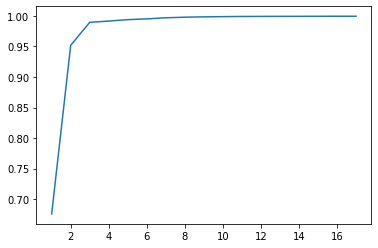

In [27]:
plt.plot(range(1,18), pls_scores)

In [28]:
pls = PLSRegression(n_components=17).fit(X_train, y_train)
train_mse = mean_squared_error(y_train, pls.predict(X_train))
test_mse = mean_squared_error(y_test, pls.predict(X_test))
print("Train MSE: ", train_mse, " | Test MSE: ", test_mse)

Train MSE:  0.028777733601962046  | Test MSE:  0.01299687036205577


In [29]:
X_full = fat_df.iloc[:,1:]
y_full = fat_df.iloc[:,0]

In [32]:
B = 100 #total loop times
all_test_errors = []
k_range = [1,3,5,7,9,11,13,15]

for b in range(B):
    test_errors = []
    #Split train and test dataset based on random state
    X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.1, random_state=b)
    
    #1. Train LinearRegression on all predictors
    lr_model = LinearRegression().fit(X_train, y_train)
    test_errors.append(mean_squared_error(y_test, lr_model.predict(X_test)))
    
    #2. Train linear regression on best subset
    k_5_lm = LinearRegression().fit(X_train[list(best_comb)], y_train)
    test_errors.append(mean_squared_error(y_test, k_5_lm.predict(X_test[list(best_comb)])))
    
    #3. Train linear regression with stepwise predictors
    step_lm = LinearRegression().fit(X_train[selected_vars], y_train)
    test_errors.append(mean_squared_error(y_test, step_lm.predict(X_test[selected_vars])))
    
    #4. Train with ridge regression model
    ridge_clf = RidgeCV(alphas=np.arange(0.01,1,0.001)).fit(X_train, y_train)
    test_errors.append(mean_squared_error(y_test, ridge_clf.predict(X_test)))
    
    #5. Train with lasso regression model
    lasso_clf = LassoCV(cv=5, random_state=7406).fit(X_train, y_train)
    test_errors.append(mean_squared_error(y_test, lasso_clf.predict(X_test)))
    
    #6. Train with principal component regression
    pca_model = PCA(n_components=17)
    x_pca = pca_model.fit_transform(X_train)
    pca_clf = LinearRegression().fit(x_pca, y_train)
    test_errors.append(mean_squared_error(y_test, pca_clf.predict(pca_model.transform(X_test))))
    
    #7. Train with PLS Regression
    pls = PLSRegression(n_components=17).fit(X_train, y_train)
    test_errors.append(mean_squared_error(y_test, pls.predict(X_test)))
    
    all_test_errors.append(test_errors)

all_test_errors

[[0.027818012174993297,
  0.022929676328478175,
  0.024541830165420456,
  0.02823059673277667,
  0.022244712152179377,
  0.02781801217499362,
  0.027818012174994047],
 [0.06868544030622183,
  0.05984839302303155,
  0.06020957225419892,
  0.005952734178608762,
  0.0019151094605095375,
  0.06868544030622296,
  0.06868544030615811],
 [0.07586988191824895,
  0.06130621789098711,
  0.05813916617522931,
  0.07907221848394777,
  0.07780368238696382,
  0.07586988191825567,
  0.07586988191825077],
 [0.013358691250216572,
  0.009644101813139695,
  0.010884397025099326,
  0.013769984668108387,
  0.012696903530963154,
  0.013358691250213457,
  0.013358691250213321],
 [0.008136727042733622,
  0.008160987120328783,
  0.005964794325427196,
  0.008239987003627412,
  0.007530760621018132,
  0.008136727042729792,
  0.008136727042728966],
 [0.13942065669895845,
  0.1392061965593586,
  0.13291341638120463,
  0.12054292622146526,
  0.1246113958299448,
  0.13942065669897377,
  0.1394206566989976],
 [0.11832

In [33]:
all_test_errors = np.array(all_test_errors)
index_names = ['LR','K_5_LR','STEP_LR','RIDGE','LASSO','PCA','PLS']
all_test_err_df = pd.DataFrame({'Mean':np.mean(all_test_errors,axis=0),
                                'Variance':np.var(all_test_errors, axis=0)},
                               index=index_names)
all_test_err_df

,Mean,Variance
LR,0.046526,0.002277
K_5_LR,0.039286,0.002037
STEP_LR,0.038914,0.001820
RIDGE,0.041464,0.002279
LASSO,0.035359,0.002267
PCA,0.046526,0.002277
PLS,0.046526,0.002277


<AxesSubplot:title={'center':'Mean Error vs. Model'}>

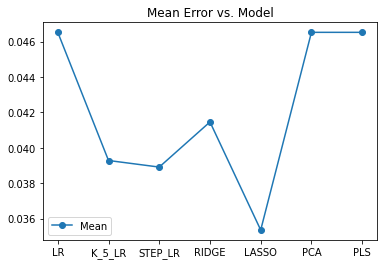

In [34]:
all_test_err_df.plot.line(y='Mean',title='Mean Error vs. Model', marker='o')

<AxesSubplot:title={'center':'Error Variance vs. Model'}>

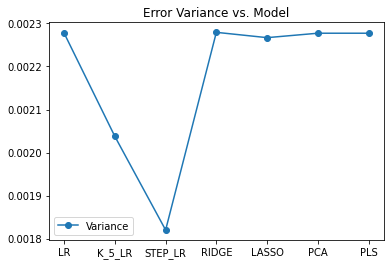

In [35]:
all_test_err_df.plot.line(y='Variance',title='Error Variance vs. Model', marker='o')